# Regresión lineal

La regresión lineal es un modelo de Machine learning supervisado, es decir, se necesita tener la variable objetivo señalada en el dataset para poder aplicar el algoritmo. Este modelo es de los más usados por su simplicidad de aplciación, ejecución y entendimiento, dentro de los puntos negativos que tiene el modelo es que necesita cumplir demasiadas hipótesis para asegurar que los resultados son de utilidad.

In [1]:
#librerías básicas a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Modelo

$$ \hat Y = \beta_0 + \beta_1 X $$

Donde $\beta_0 $ y $\beta_1 $ son los coeficientes de regresión (variables a calcular), y $ X $ es la variable regresora. El producto de la función anterior da como resultado una predicción a lo que se tenga como objeto de estudio.

In [2]:
model = lambda b_0, b_1, x: b_0 + (b_1 * x) 

## Error cuadrático medio

$$ ECM = \frac{1}{N} \sum_{i = 0} ^{N} ( y_i - \hat y_i )^2 $$ 

In [3]:
def e_c_m(y, y_hat):
    '''
    inputs:
        y, y_hat :iterable operable con numpy
    
    outputs:
        error -> valor float
    
    '''
    N = y.shape[0]
    error = np.sum((y - y_hat)**2) / N
    return error

## Descenso del gradiente

El agoritmo del descenso del gradiente nos permite Actualizar los valores de $ \beta_0, \beta_1 $, esto toma sentido pues al conjunto de datos que se aplicará el descenso del gradienre es al EMC, pues al ser una función polinómica de grado 2 podemos encontrar el minimo por medio de la derivada.

In [4]:
def gradient_desc(b_0, b_1, alpha, x, y):
    '''
    inputs:
        b_0, b1: valores float
        alpha: float
        x,y: iterables
    outputs:
        b0, b1: valores float
    
    '''
    N = x.shape[0]      # Cantidad de datos

    # Gradientes: derivadas de la función de error con respecto
    # a los parámetros "b_0" y "b_1"
    db_0 = -(2/N)*np.sum(x * (y - (b_0 * x + b_1)) )
    db_1 = -(2/N)*np.sum(y - (b_0 * x + b_1) )

    # Actualizar los pesos usando la fórmula del descenso del gradiente
    b0 = b_0 - alpha*db_0
    b1 = b_1 - alpha*db_1

    return b0, b1

## Importación de datos

In [5]:
# datos = pd.read_csv('Salary_Data.csv')

# x = datos['YearsExperience'].values
# y = datos['Salary'].values / 10_000

In [6]:
datos = pd.read_csv('insurance.csv')

x = datos['bmi'].values
y = datos['charges'].values

In [7]:
max(y), min(y)

(63770.42801, 1121.8739)

In [8]:
#parametros de inicialización de la regresión lineal, dos puntos aleatorios
np.random.seed(2204)
b_0 = np.random.randn(1)[0]
b_1 = np.random.randn(1)[0]
b_0, b_1

(0.20127124220122578, -0.5514389786038747)

In [9]:
# valores para el descenso del gradiente
alpha = 0.0005
iters = 50_000

In [10]:
#arreglo de ceros del tamaño del numero de iteraciones
error = np.zeros((iters,1))

In [11]:
for i in range(iters):
    # Actualizar valor de los pesos usando el gradiente descendente
    [b_0, b_1] = gradient_desc(b_0 , b_1, alpha, x, y)

    # Calcular el valor de la predicción
    y_hat = model(b_0, b_1, x)

    # Actualizar el valor del error
    error[i] = e_c_m(y, y_hat)

    # Imprimir resultados cada 1000 epochs o iteraciones 
    if (i + 1) % 1000 == 0:
        print("Epoch {}".format(i + 1))
        print(" beta_0 : {:.1f}".format(b_0), "\n beta_1 : {:.1f}".format(b_1))
        print(" error: {}".format(error[i]))
        print("=======================================")

Epoch 1000
 beta_0 : 429.5 
 beta_1 : 56.9
 error: [2.68094856e+08]
Epoch 2000
 beta_0 : 428.2 
 beta_1 : 99.3
 error: [2.40004557e+08]
Epoch 3000
 beta_0 : 426.9 
 beta_1 : 140.0
 error: [2.16265364e+08]
Epoch 4000
 beta_0 : 425.7 
 beta_1 : 179.3
 error: [1.96473406e+08]
Epoch 5000
 beta_0 : 424.5 
 beta_1 : 217.1
 error: [1.80257545e+08]
Epoch 6000
 beta_0 : 423.3 
 beta_1 : 253.4
 error: [1.67276862e+08]
Epoch 7000
 beta_0 : 422.3 
 beta_1 : 288.4
 error: [1.57218335e+08]
Epoch 8000
 beta_0 : 421.2 
 beta_1 : 322.2
 error: [1.49794684e+08]
Epoch 9000
 beta_0 : 420.2 
 beta_1 : 354.6
 error: [1.44742386e+08]
Epoch 10000
 beta_0 : 419.2 
 beta_1 : 385.9
 error: [1.41819831e+08]
Epoch 11000
 beta_0 : 418.3 
 beta_1 : 415.9
 error: [1.40805625e+08]
Epoch 12000
 beta_0 : 417.3 
 beta_1 : 444.9
 error: [1.41497012e+08]
Epoch 13000
 beta_0 : 416.5 
 beta_1 : 472.8
 error: [1.43708423e+08]
Epoch 14000
 beta_0 : 415.6 
 beta_1 : 499.6
 error: [1.4727013e+08]
Epoch 15000
 beta_0 : 414.8 
 be

## Gráfico del error 

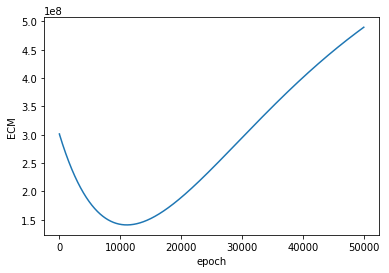

In [12]:
plt.plot(range(iters), error)
plt.xlabel('epoch')
plt.ylabel('ECM')
plt.show()

## gráfica de la regresión

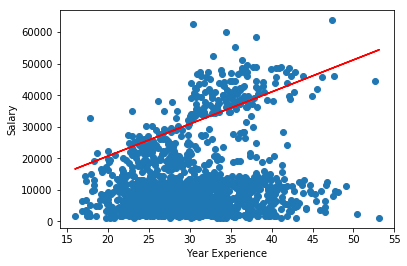

In [13]:
y_preds = model(b_0 ,b_1 ,x)
plt.scatter(x, y)
plt.plot(x , y_preds,'r')
plt.xlabel('BMI')
plt.ylabel('CHARGES')
plt.show()

elaborado por: Jonathan Ramirez